In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [15]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
X = data.data
y = data.target

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 45)

In [58]:
from sklearn.linear_model import LinearRegression
L = LinearRegression(fit_intercept=True)

In [59]:
L.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = L.predict(X_test)

In [54]:
param_grid = {"fit_intercept": [True, False]}

In [55]:
gd1 = GridSearchCV(L,param_grid,cv = 5)

In [56]:
gd1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [61]:
print(gd1.best_params_)

{'fit_intercept': True}


In [62]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score ",r2_score(y_test,y_pred))
print('RMSE ', np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score  0.5188113124539249
RMSE  48.72713760953253


In [63]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.01)

In [50]:
R.fit(X_train,y_train)

Ridge(alpha=0.01)

In [51]:
y_pred1 = R.predict(X_test)

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score ",r2_score(y_test,y_pred1))
print("Mean squared error ", np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score  0.5230847087541542
Mean squared error  48.510284264409194


In [64]:
#finding the best parametes
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid1 = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}
gd = GridSearchCV(R,param_grid=param_grid1, cv = 5, scoring="neg_mean_squared_error")

In [47]:
gd.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.0001),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [48]:
print(gd.best_params_)

{'alpha': 0.01}


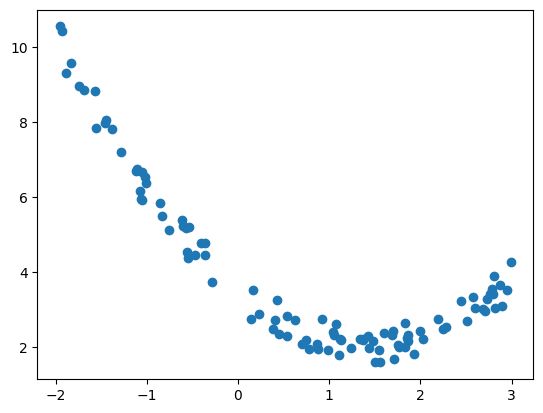

In [68]:
import random
m = 100
X1 = 5 * np.random.rand(m, 1) -2
X2 = 0.7 * X1 ** 2-2 * X1 +3 + np.random.rand(m, 1)

plt.scatter(X1,X2)
plt.show()

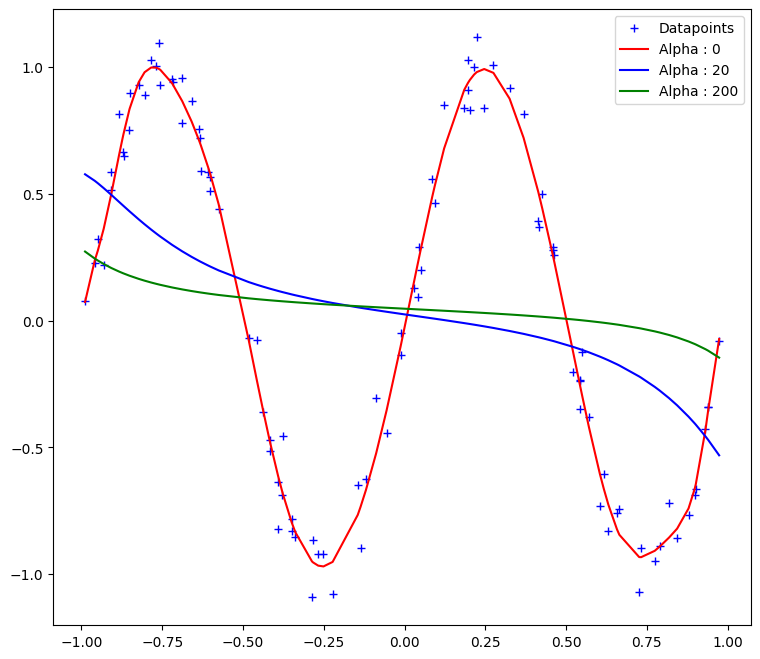

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X1, X2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree = 16)),
        ('ridge', Ridge(alpha = alpha))])
    model.fit(X1,X2)
    return model.predict(X1)

alphas = [0,20,200]
cs = ['r','b','g']


plt.figure(figsize = (9,8))
plt.plot(X1,X2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas,cs):
    preds = get_preds_ridge(X1, X2, alpha)
    #plot
    plt.plot(sorted(X1[:,0]),preds[np.argsort(X1[:,0])],c, label = 'Alpha : {}'.format(alpha))
plt.legend()
plt.show()


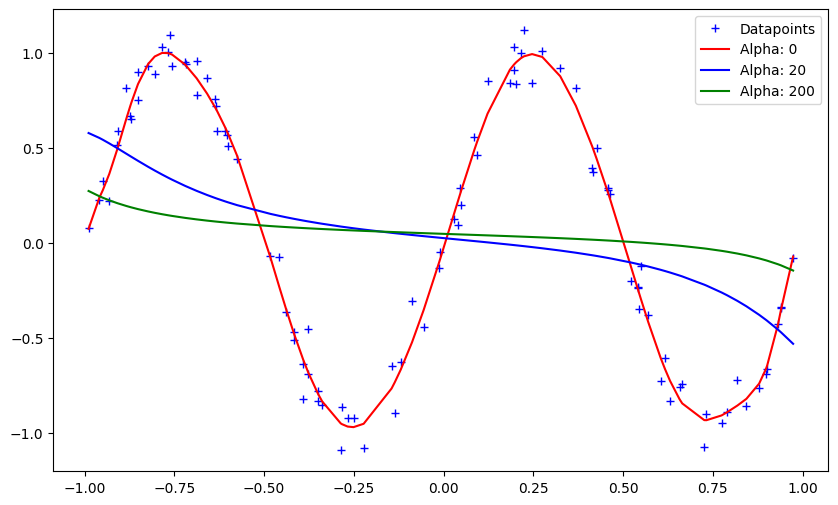

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Example Data (Ensure X1 is 2D and X2 is 1D)
np.random.seed(42)
X1 = np.sort(2 * np.random.rand(100, 1) - 1, axis=0)  # Random values between -1 and 1
X2 = np.sin(2 * np.pi * X1).ravel() + np.random.randn(100) * 0.1  # Sine wave with noise

# Function to get predictions
def get_preds_ridge(X1, X2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),  # Fixed Typo
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X1, X2)  # Ensure X1 is features, X2 is target
    return model.predict(X1)

# Define Alpha Values and Colors
alphas = [0, 20, 200]
cs = ['r', 'b', 'g']

# Plot Data
plt.figure(figsize=(10, 6))
plt.plot(X1, X2, 'b+', label='Datapoints')

# Fit and Plot Ridge Models for Different Alpha Values
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X1, X2, alpha)
    plt.plot(X1, preds, c, label=f'Alpha: {alpha}')  # No need to sort again, X1 is sorted

plt.legend()
plt.show()
